# Algoritma Talk 15-11-2017

# Introduction - who am I?

![title](images/julo1.png)

![title](images/julo4.png)

![title](images/julo2.png)

### Objectives of this talk:
    
    - What is a data scientist?
    - How did I become a data scientist?
    - How do you become a data scientist?
    - What is the difference between data science in a class room and data science on the workfloor?

    

### What is a data scientist?

![title](images/2.jpg)

Magic, danger, hacking...

![title](images/1.png)

added "visualization".. but what's the end-game?

![title](images/3.png)

the importance of value

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Introduction

This year, for the first time, we conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. We received over **16,000 responses** and learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field. The below report shares some of our key findings and includes interactive visualizations so you can easily cut the data to find out exactly what you want to know. Here are some sample takeaways:

https://www.kaggle.com/surveys/2017

![title](images/kaggle_state.png)

## Loading the dataset

In [6]:
MC = 'kaggle-survey-2017/multipleChoiceResponses.csv'
FF = 'kaggle-survey-2017/freeformResponses.csv'

mc = pd.read_csv(MC, encoding='ISO-8859-1', low_memory=False)
ff = pd.read_csv(FF, encoding='ISO-8859-1', low_memory=False)

In [7]:
ff.shape

(16716, 62)

In [8]:
mc.shape

(16716, 228)

In [9]:
mc.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
ff.head()

,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding our dataset

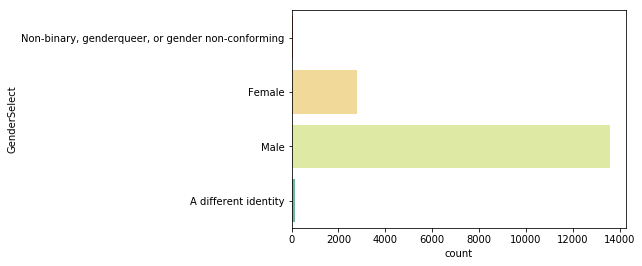

In [10]:
sns.countplot(y='GenderSelect', data=mc, palette='Spectral')

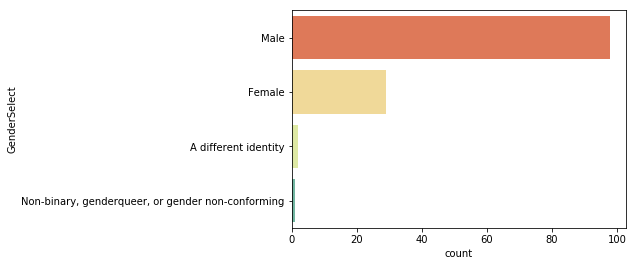

In [11]:
sns.countplot(y='GenderSelect', data=mc[mc.Country=='Indonesia'], palette='Spectral')

# Age distribution

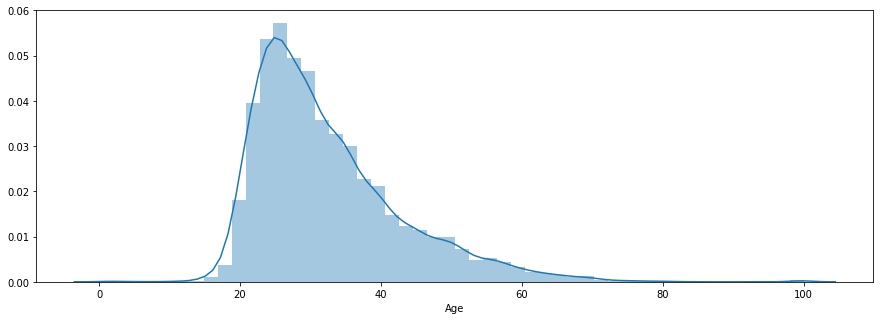

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

sns.distplot(mc.Age[mc.Age > 0])

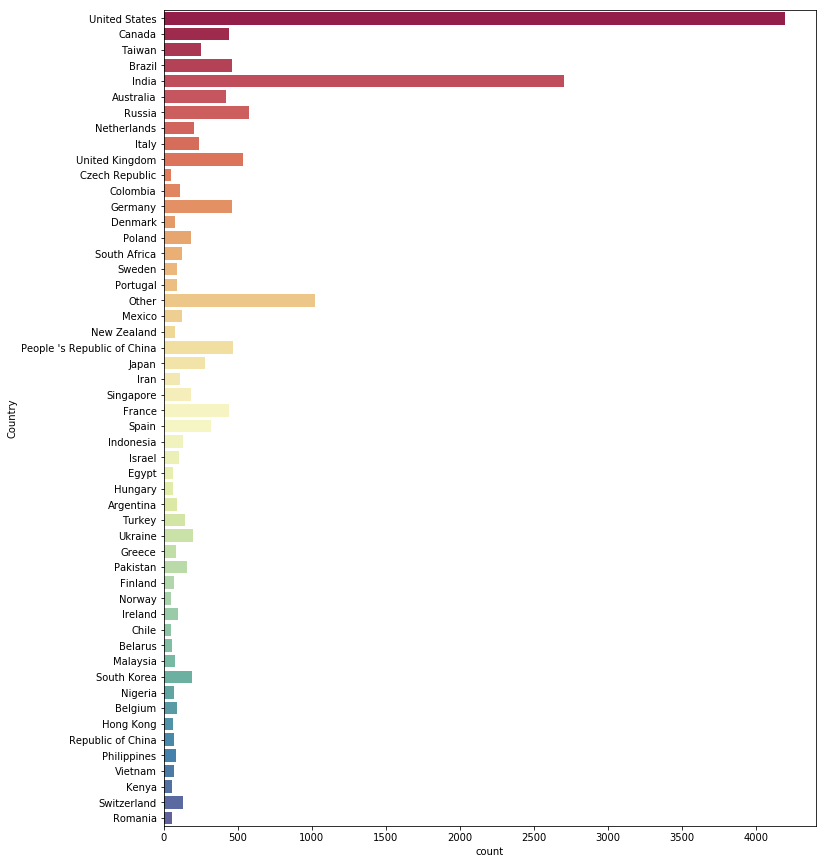

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 15)

# sns.countplot(y='Country', data=mc, palette='Blues_d')
sns.countplot(y='Country', data=mc, palette='Spectral')

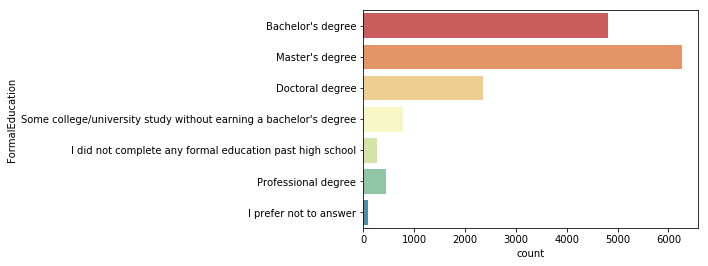

In [13]:
sns.countplot(y='FormalEducation', data=mc, palette='Spectral')

## Academic backgrounds

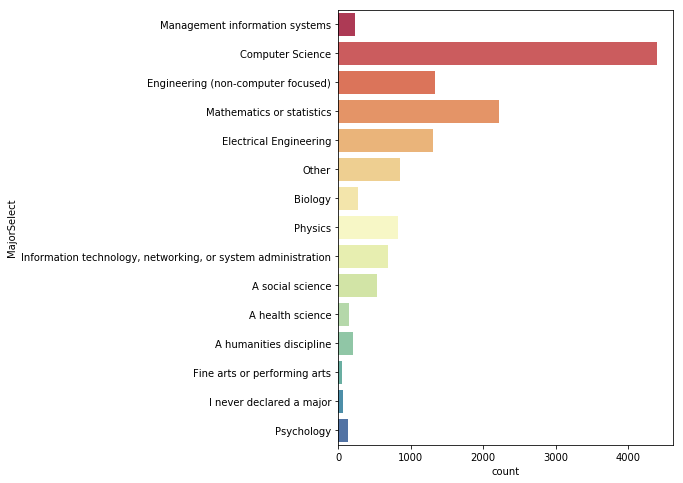

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mc, palette='Spectral')

# Employment status

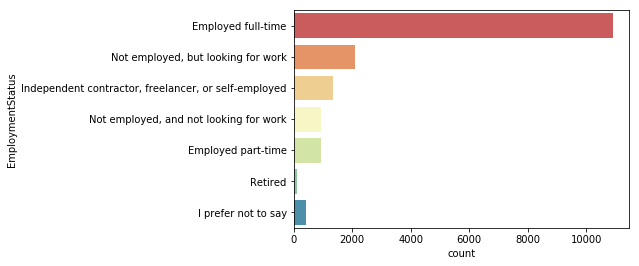

In [15]:
sns.countplot(y='EmploymentStatus', data=mc, palette='Spectral')

# Programming experience

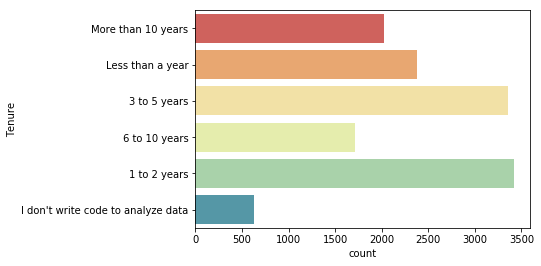

In [16]:
sns.countplot(y='Tenure', data=mc, palette='Spectral')

In [88]:
mc.Tenure.value_counts(normalize=True).to_frame()*100

,Tenure
1 to 2 years,25.302986
3 to 5 years,24.793083
Less than a year,17.587940
More than 10 years,14.986698
6 to 10 years,12.666273
I don't write code to analyze data,4.663021


# Which programming language do you recommend?

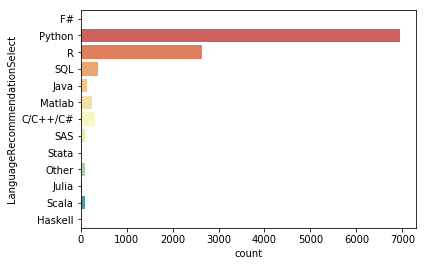

In [17]:
sns.countplot(y='LanguageRecommendationSelect', data=mc, palette='Spectral')

# Programming languages per job title

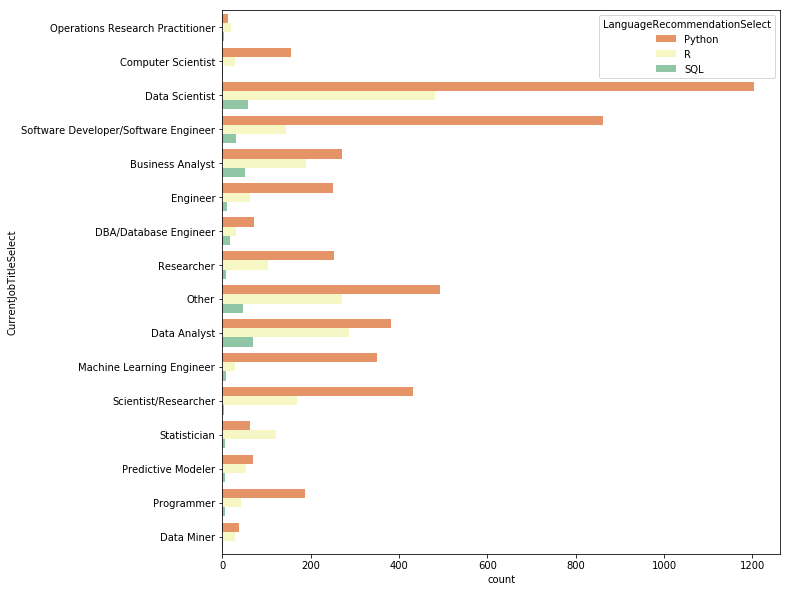

In [18]:
data = mc[(mc['CurrentJobTitleSelect'].notnull()) & ((mc['LanguageRecommendationSelect'] == 'Python') |(mc['LanguageRecommendationSelect'] == 'R') | (mc['LanguageRecommendationSelect'] == 'SQL') )]

plt.figure(figsize=(10, 10))

sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data, palette='Spectral')

# What to study next year?

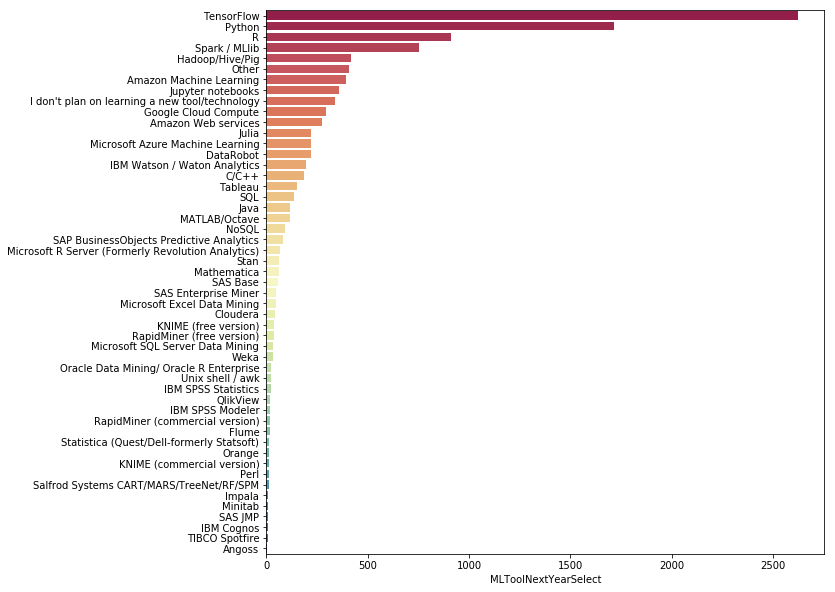

In [19]:
data = mc['MLToolNextYearSelect'].value_counts()
plt.figure(figsize=(10, 10))


sns.barplot(y=data.index, x=data, palette='Spectral')

# What are the next hot fields in Data Science

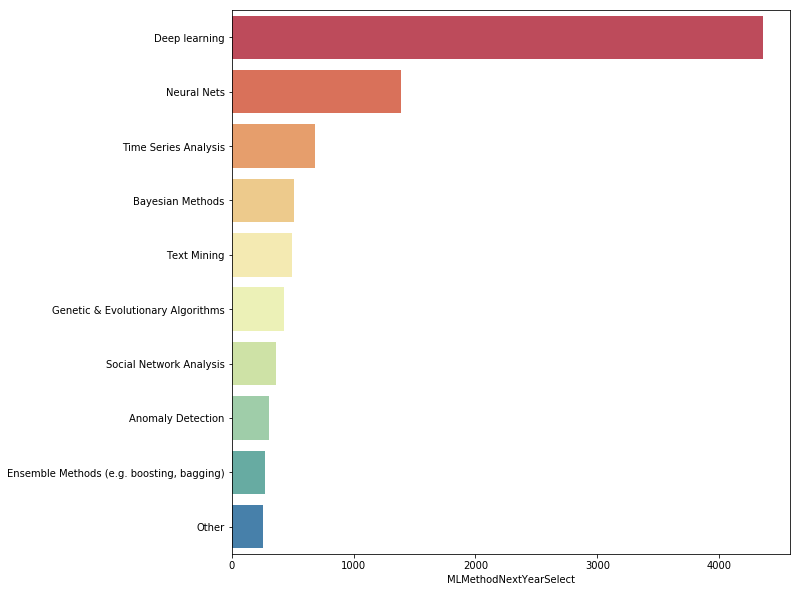

In [20]:
data = mc['MLMethodNextYearSelect'].value_counts().head(10)
plt.figure(figsize=(10, 10))


sns.barplot(y=data.index, x=data, palette='Spectral')

# What are the best online resources?

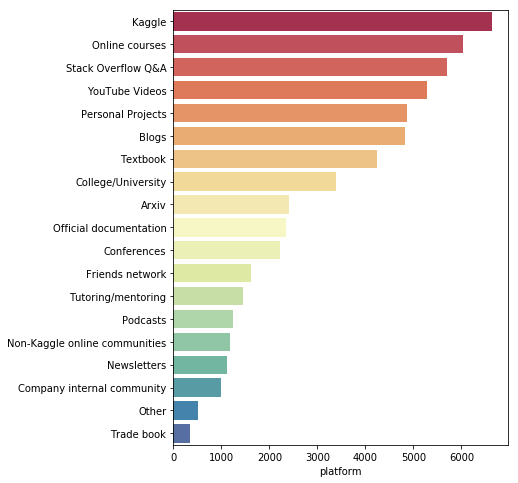

In [21]:
mc['LearningPlatformSelect'] = mc['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mc.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts()
sns.barplot(y=data.index, x=data, palette='Spectral')

# How much should I study per week?

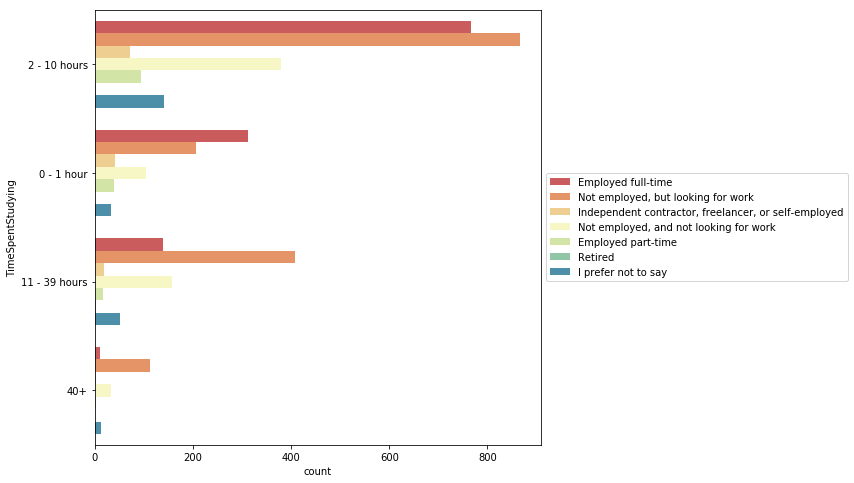

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=mc, hue='EmploymentStatus', palette='Spectral').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Most popular online course platforms

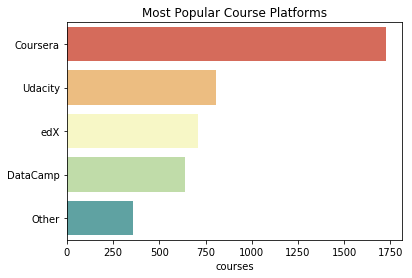

In [23]:
mc['CoursePlatformSelect'] = mc['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
t = mc.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t = t[t != 'nan'].value_counts()
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t, palette='Spectral')

# Daily work: Biggest challenges

In [96]:
ff['PersonalProjectsChallengeFreeForm'].value_counts().head(20).to_frame()

,PersonalProjectsChallengeFreeForm
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


# Most important things to have on a DS Resume

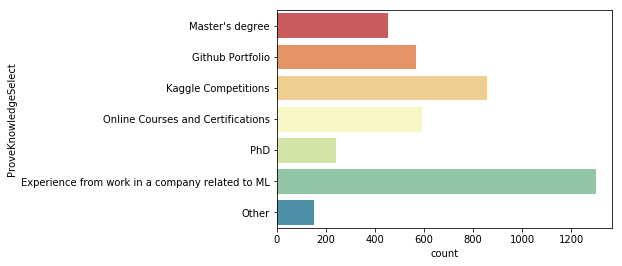

In [24]:
sns.countplot(y='ProveKnowledgeSelect', data=mc, palette='Spectral')

# Do I need to understand the ML algorithms?

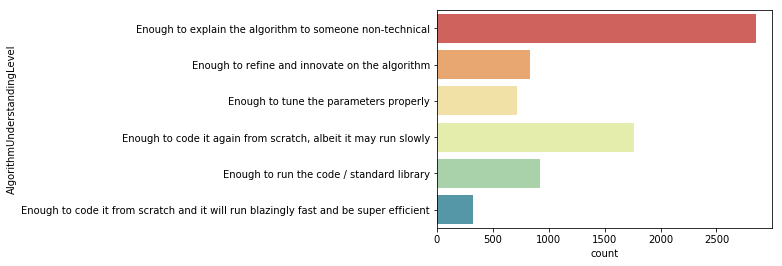

In [25]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mc, palette='Spectral')

# Where to find a job?

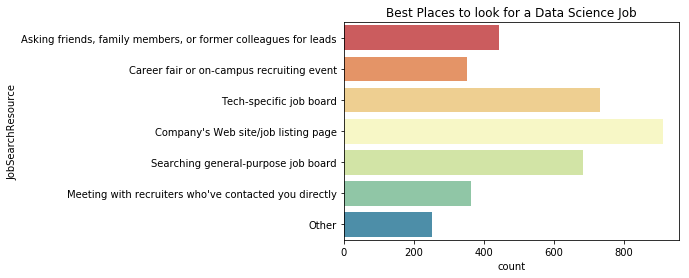

In [26]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mc, palette='Spectral')

![title](images/julo3.png)

![title](images/julo1.png)